**Used RANDOM FOREST**

"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."

In [ ]:

import pandas as pd


data_1 = pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /data_1.csv')
data_2 = pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /data_2.csv')

dataset1= pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /healthy.csv')

dataset3= pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /Banking dataset.csv')

#concatenate the 2 datasets....
dataset2 = pd.concat([data_1, data_2], axis=0, ignore_index=True)




In [ ]:
#name of the 2 dataset..
dataset2.head()
print("-----")
dataset1.head()




-----


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Accuracy: 0.9360


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


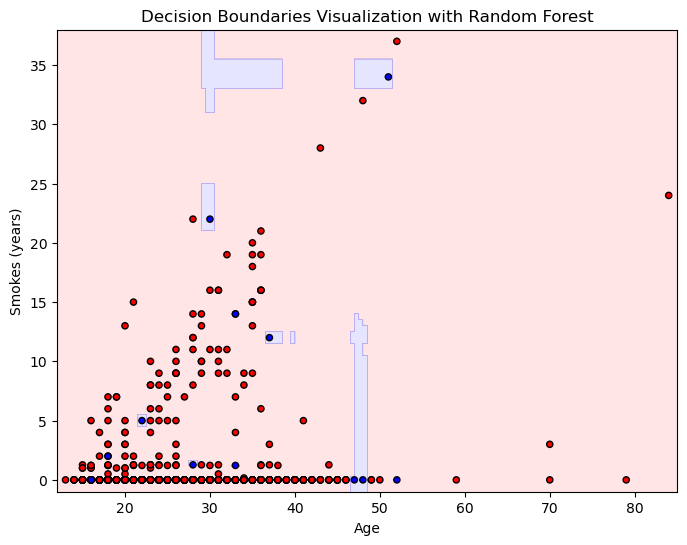

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Select two features for visualization
feature1 = 'Age'
feature2 = 'Smokes (years)'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization with Random Forest')
plt.show()


Cross-Validated Accuracy: 0.9511
Cross-Validated Precision: 0.6698
Cross-Validated Recall: 0.4545
Cross-Validated F1: 0.5371
Cross-Validated Roc_auc: 0.9423


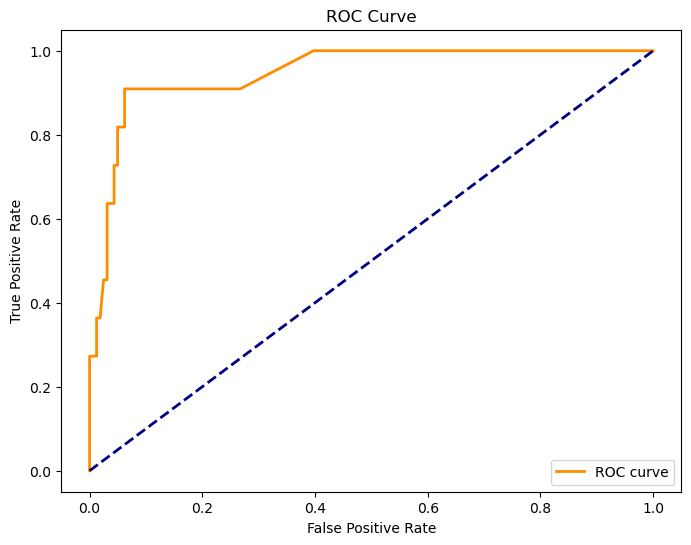

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the classifier using cross-validation
for metric in scoring_metrics:
    scores = cross_val_score(clf, X, y, cv=cv, scoring=metric)
    print(f"Cross-Validated {metric.capitalize()}: {np.mean(scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# for DATASET 2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr']

# Use cross_validate to compute multiple scores in a single call
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring_metrics, return_train_score=False)

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Cross-Validated Precision: {np.mean(cv_results['test_precision_weighted']):.4f}")
print(f"Cross-Validated Recall: {np.mean(cv_results['test_recall_weighted']):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(cv_results['test_f1_weighted']):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(cv_results['test_roc_auc_ovr']):.4f}")


Cross-Validated Accuracy: 0.9403
Cross-Validated Precision: 0.9390
Cross-Validated Recall: 0.9403
Cross-Validated F1 Score: 0.9388
Cross-Validated AUC-ROC Score: 0.9861


Accuracy: 0.8498


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


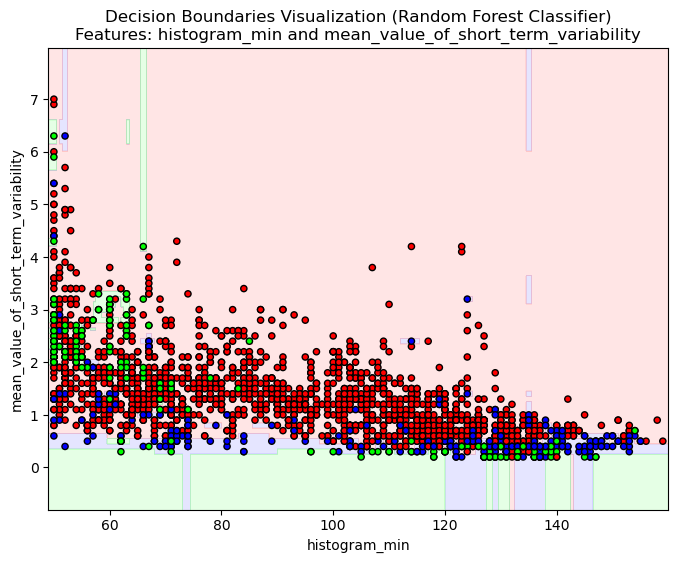

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Select two features for visualization
feature1 = 'histogram_min'
feature2 = 'mean_value_of_short_term_variability'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization (Random Forest Classifier)\nFeatures: {} and {}'.format(feature1, feature2))
plt.show()


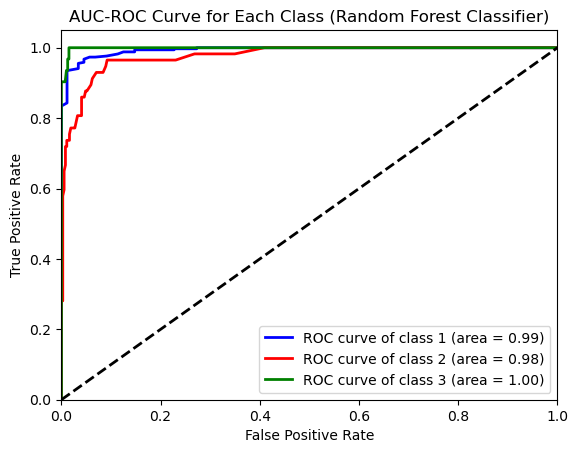

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)


y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))

# Train the classifier
clf.fit(X_train, y_train)

# Plot AUC-ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['b', 'r', 'g'])  # Using color abbreviations
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Each Class (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()


# for the dataset 3 ...

/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Cross-Validated Accuracy: 0.9123
Cross-Validated Precision: 0.6306
Cross-Validated Recall: 0.5362
Cross-Validated F1 Score: 0.5793
Cross-Validated AUC-ROC Score: 0.9388


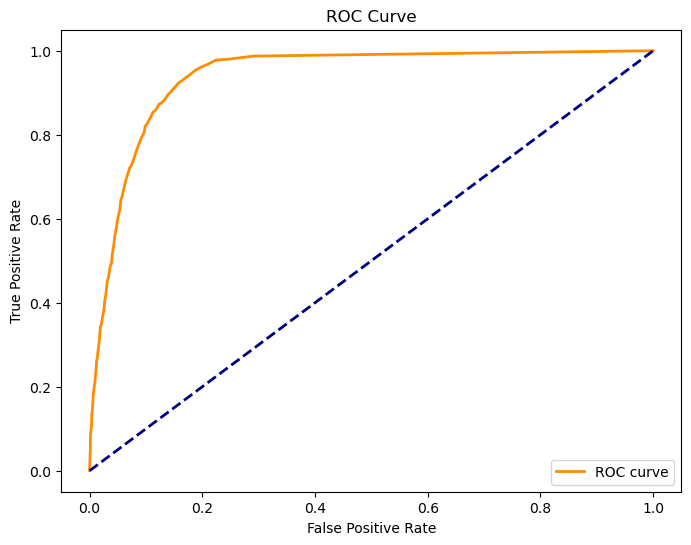

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'dataset3' is your DataFrame

X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over folds
for train_idx, test_idx in cv.split(X_imputed, y):
    X_train, X_test = X_imputed[train_idx], X_imputed[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


x_min: 0, x_max: 7
y_min: 0.634, y_max: 5.045
Adjusted x_min: -1.0, x_max: 8.0
Adjusted y_min: -0.366, y_max: 6.045


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


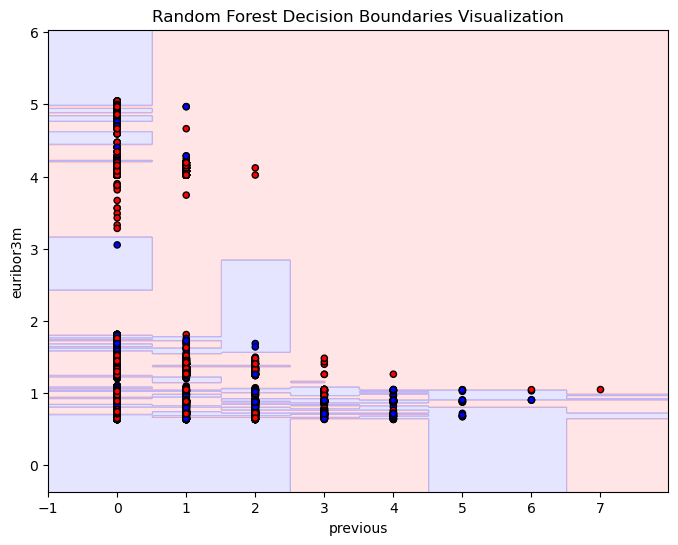

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Select two features for visualization
feature1 = 'previous'
feature2 = 'euribor3m'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Print the min and max values of features for debugging
print(f"x_min: {X_visualization[feature1].min()}, x_max: {X_visualization[feature1].max()}")
print(f"y_min: {X_visualization[feature2].min()}, y_max: {X_visualization[feature2].max()}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = float(X_visualization[feature1].min()) - 1, float(X_visualization[feature1].max()) + 1
y_min, y_max = float(X_visualization[feature2].min()) - 1, float(X_visualization[feature2].max()) + 1

print(f"Adjusted x_min: {x_min}, x_max: {x_max}")
print(f"Adjusted y_min: {y_min}, y_max: {y_max}")

#meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays
#representing the Cartesian indexing or Matrix indexing
# Create a meshgrid

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Random Forest Decision Boundaries Visualization')
plt.show()


In [ ]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.3 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


# Q3.. XGBoost as a clasifier

# for the dataset 1


Accuracy: 0.9360


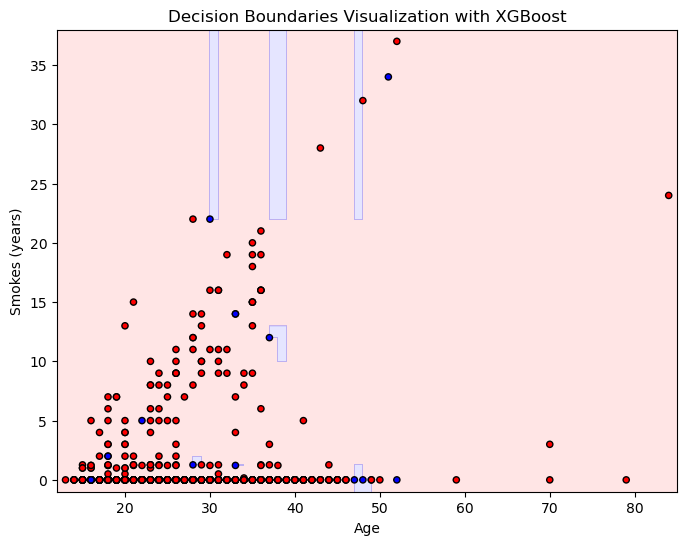

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


# Assuming your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Select two features for visualization
feature1 = 'Age'
feature2 = 'Smokes (years)'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization with XGBoost')
plt.show()


Cross-Validated Accuracy: 0.9487
Cross-Validated Precision: 0.6343
Cross-Validated Recall: 0.5091
Cross-Validated F1: 0.5602
Cross-Validated Roc_auc: 0.9423


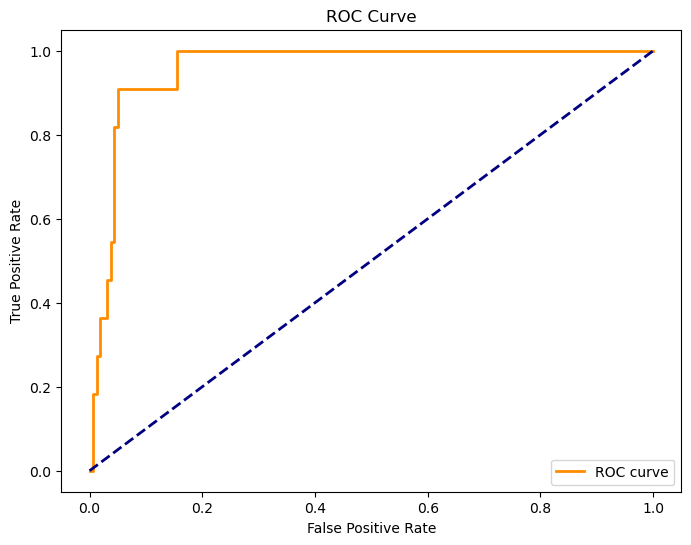

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from xgboost import XGBClassifier  # Import XGBoost Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


#  your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

"""StratifiedKFold is a type of cross-validation technique used in machine learning
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample"""
# Perform 5-fold cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the classifier using cross-validation
for metric in scoring_metrics:
    scores = cross_val_score(clf, X, y, cv=cv, scoring=metric)
    print(f"Cross-Validated {metric.capitalize()}: {np.mean(scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# XGboost as the classifier for dataset 2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from xgboost import XGBClassifier  # Import XGBoost Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)
y = dataset2['fetal_health']

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Ensure the target variable starts from 0 and is consecutive
y_unique = y.unique()
class_mapping = {class_label: idx for idx, class_label in enumerate(y_unique)}
y = y.map(class_mapping)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr']

# Use cross_validate to compute multiple scores in a single call
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring_metrics, return_train_score=False)

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Cross-Validated Precision: {np.mean(cv_results['test_precision_weighted']):.4f}")
print(f"Cross-Validated Recall: {np.mean(cv_results['test_recall_weighted']):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(cv_results['test_f1_weighted']):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(cv_results['test_roc_auc_ovr']):.4f}")


Cross-Validated Accuracy: 0.9534
Cross-Validated Precision: 0.9527
Cross-Validated Recall: 0.9534
Cross-Validated F1 Score: 0.9527
Cross-Validated AUC-ROC Score: 0.9883


Accuracy: 0.8732


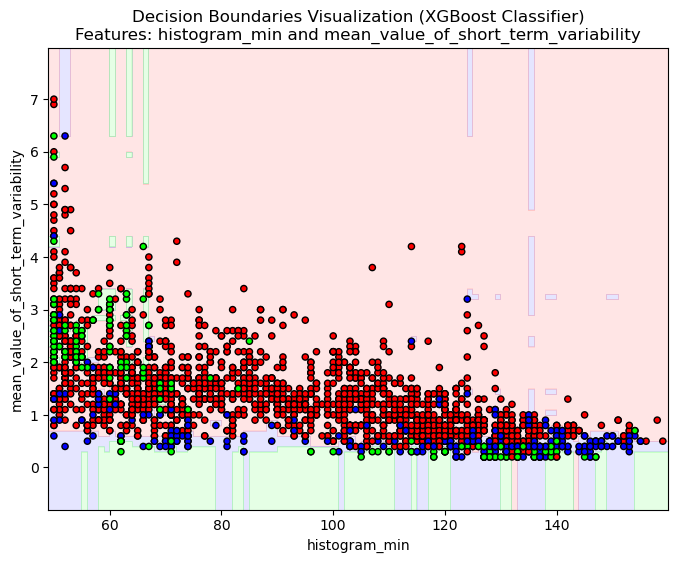

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'fetal_health'

X = dataset2.drop('fetal_health', axis=1)
y = dataset2['fetal_health']

# Map class labels to consecutive integers starting from 0
class_mapping = {label: idx for idx, label in enumerate(sorted(y.unique()))}
y = y.map(class_mapping)

# Select two features for visualization
feature1 = 'histogram_min'
feature2 = 'mean_value_of_short_term_variability'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization (XGBoost Classifier)\nFeatures: {} and {}'.format(feature1, feature2))
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Binarize the output
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
clf = OneVsRestClassifier(XGBClassifier(random_state=42))

# Train the classifier
clf.fit(X_train, y_train)

# Plot AUC-ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Each Class (XGBoost Classifier)')
plt.legend(loc="lower right")
plt.show()


# XGBOOST classifier for dataset 3

Cross-Validated Accuracy: 0.9136
Cross-Validated Precision: 0.6406
Cross-Validated Recall: 0.5325
Cross-Validated F1 Score: 0.5814
Cross-Validated AUC-ROC Score: 0.9453


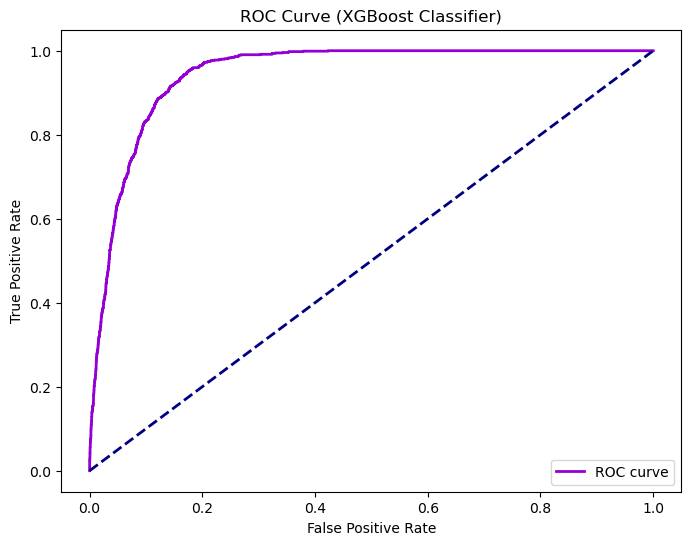

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over folds
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Print the cross-validation evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkviolet', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost Classifier)')
plt.legend(loc='lower right')
plt.show()


x_min: 0.634, x_max: 5.045
y_min: 0, y_max: 4918
Adjusted x_min: -0.366, x_max: 6.045
Adjusted y_min: -1.0, y_max: 4919.0


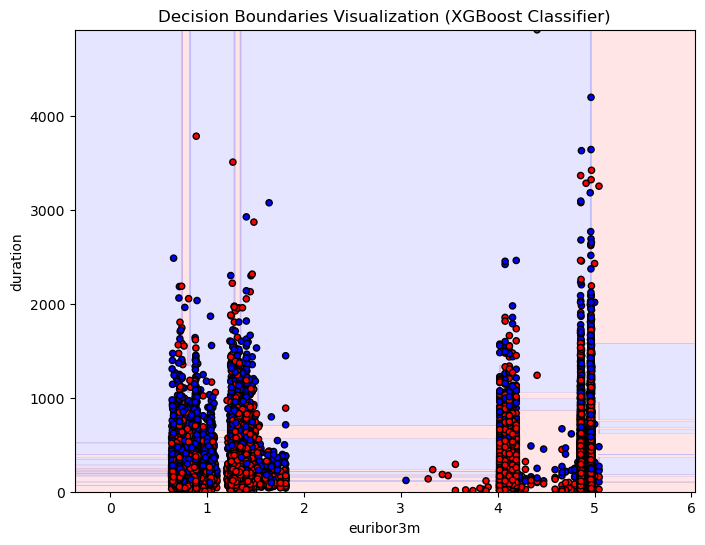

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Select two features for visualization
feature1 = 'euribor3m'
feature2 = 'duration'
# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
clf = XGBClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Print the min and max values of features for debugging
print(f"x_min: {X_visualization[feature1].min()}, x_max: {X_visualization[feature1].max()}")
print(f"y_min: {X_visualization[feature2].min()}, y_max: {X_visualization[feature2].max()}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = float(X_visualization[feature1].min()) - 1, float(X_visualization[feature1].max()) + 1
y_min, y_max = float(X_visualization[feature2].min()) - 1, float(X_visualization[feature2].max()) + 1

print(f"Adjusted x_min: {x_min}, x_max: {x_max}")
print(f"Adjusted y_min: {y_min}, y_max: {y_max}")

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization (XGBoost Classifier)')
plt.show()


# **Adaboost as the classifier.**

for dataset1

Accuracy: 0.9360


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


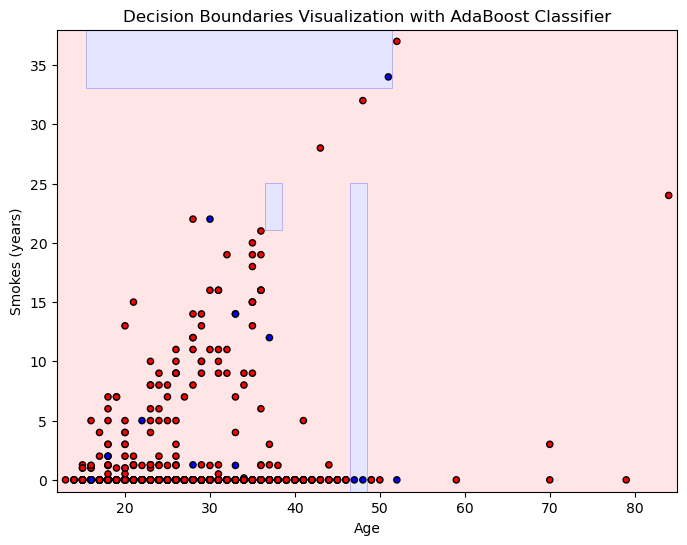

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Select two features for visualization
feature1 = 'Age'
feature2 = 'Smokes (years)'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization with AdaBoost Classifier')
plt.show()


Cross-Validated Accuracy: 0.9534
Cross-Validated Precision: 0.6741
Cross-Validated Recall: 0.5636
Cross-Validated F1 Score: 0.6113
Cross-Validated AUC-ROC Score: 0.8426


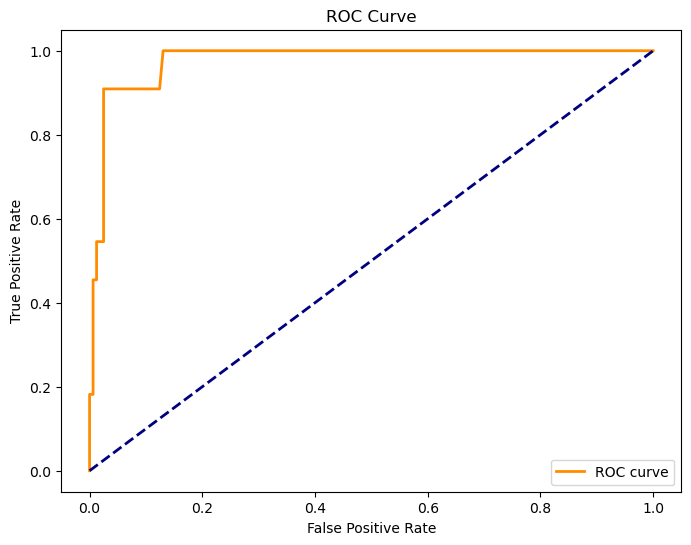

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Assuming your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the classifier using cross-validation
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(clf, X, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')
roc_auc_scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Adaboost as the classifier.
for dataset2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

#Iterate over folds
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")


Cross-Validated Accuracy: 0.8829
Cross-Validated Precision: 0.8888
Cross-Validated Recall: 0.8829
Cross-Validated F1 Score: 0.8843
Cross-Validated AUC-ROC Score: 0.8836


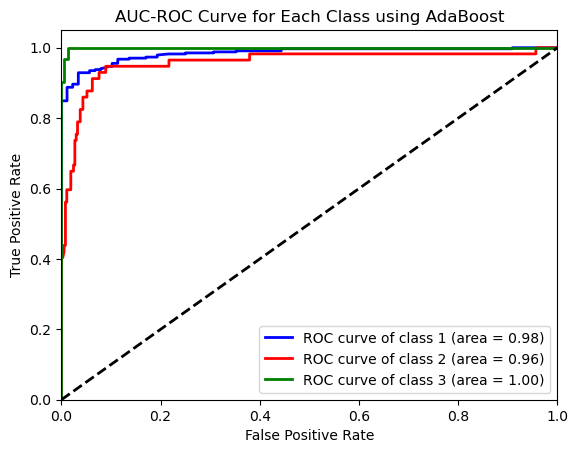

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Binarize the output
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = OneVsRestClassifier(AdaBoostClassifier(random_state=42))

# Train the classifier
clf.fit(X_train, y_train)

# Plot AUC-ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Each Class using AdaBoost')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8474


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


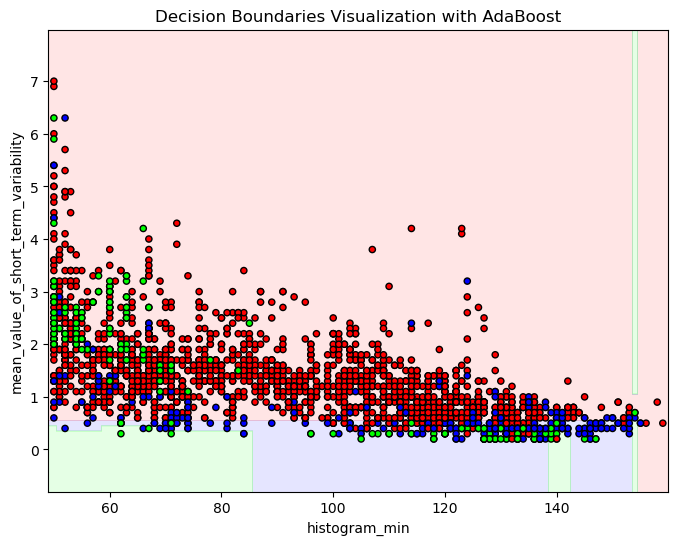

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Select two features for visualization (change these according to your dataset)
feature1 = 'histogram_min'  # Replace with the actual feature name
feature2 = 'mean_value_of_short_term_variability'  # Replace with the actual feature name

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization with AdaBoost')
plt.show()


# Adaboost as the classifier. for dataset3


Mean Precision: 0.6621725796336417
Mean Recall: 0.38405172413793104
Mean F1 Score: 0.4856772749046974
Mean Accuracy: 0.9084441460103265
Mean ROC AUC: 0.9381816910773779


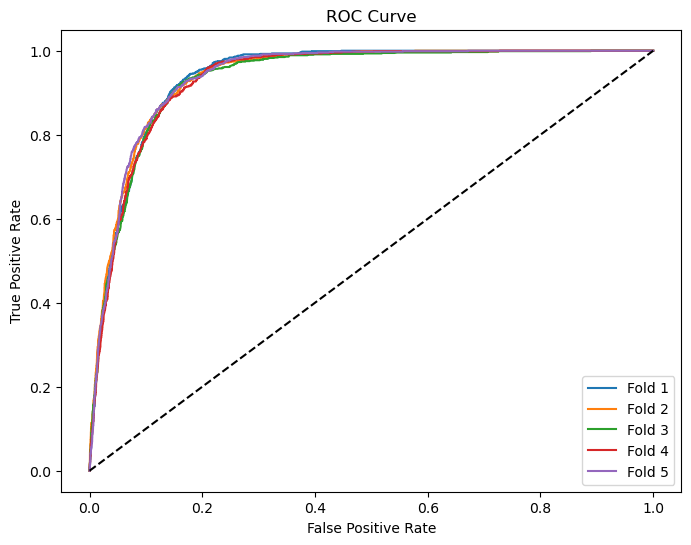

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    dataset3[column] = label_encoder.fit_transform(dataset3[column])

# Separate features and target variable
X = dataset3.drop('y', axis=1)
y = dataset3['y']

# Initialize Adaboost classifier
adaboost_classifier = AdaBoostClassifier()

# Initialize StratifiedKFold for 5-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
roc_auc_scores = []

# Initialize the figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Adaboost classifier
    adaboost_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = adaboost_classifier.predict(X_test)

    # Calculate evaluation metrics
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

    # Calculate ROC curve and AUC
    y_prob = adaboost_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_scores.append(auc(fpr, tpr))

    # Plot ROC curve for each fold
    plt.plot(fpr, tpr, label=f'Fold {len(roc_auc_scores)}')

# Calculate and print mean scores
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1}')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean ROC AUC: {mean_roc_auc}')

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)
y = dataset3['y']

# Select two features for visualization
feature1 = 'duration'
feature2 = 'campaign'

# Handle non-numeric values
X.replace('unknown', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization with AdaBoost for dataset3')
plt.show()


Accuracy: 0.8886


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8823


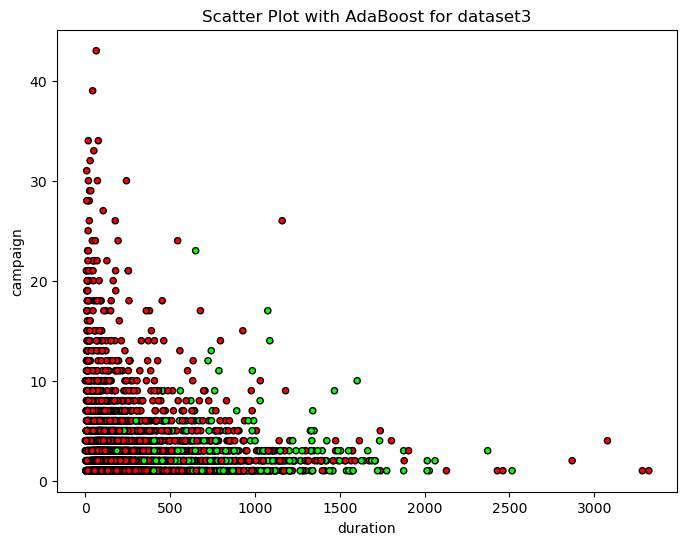

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load your dataset3 (replace 'dataset3.csv' with your actual file path)


# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Select two features for visualization
feature1 = 'duration'
feature2 = 'campaign'

# Handle non-numeric values
X.replace('unknown', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Use a random subset of data for visualization
X_visualization_subset = X_visualization.sample(frac=0.2, random_state=42)
y_subset = y.loc[X_visualization_subset.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization_subset, y_subset, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Simplified visualization using scatter plots
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
plt.figure(figsize=(8, 6))
plt.scatter(X_visualization_subset[feature1], X_visualization_subset[feature2], c=y_subset, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot with AdaBoost for dataset3')
plt.show()
